In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("properties_2017.csv")
    dataO = pd.read_csv("properties_2016.csv")
    #data = pd.read_csv("train_2017.csv")
    print "dataset has {} samples with {} features each.".format(*data.shape)
    print "Older dataset has {} samples with {} features each.".format(*dataO.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

/Users/TheResearcher/Desktop/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/TheResearcher/Desktop/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


dataset has 2985217 samples with 58 features each.
Older dataset has 2985217 samples with 58 features each.


In [2]:
#(data.ix[:,49]).isnull().values.all() # if all values of column 49 are null 
#(data.ix[:,49]).isnull().sum() #column 49 s count of null values
#data.ix[:,49].loc[~(data.ix[:,49]).isnull()] #not null values of column 49
dataO.loc[dataO['parcelid']==10711910]
data.loc[dataO['heatingorsystemtypeid']==9].head()

Empty DataFrame
Columns: [parcelid, airconditioningtypeid, architecturalstyletypeid, basementsqft, bathroomcnt, bedroomcnt, buildingclasstypeid, buildingqualitytypeid, calculatedbathnbr, decktypeid, finishedfloor1squarefeet, calculatedfinishedsquarefeet, finishedsquarefeet12, finishedsquarefeet13, finishedsquarefeet15, finishedsquarefeet50, finishedsquarefeet6, fips, fireplacecnt, fullbathcnt, garagecarcnt, garagetotalsqft, hashottuborspa, heatingorsystemtypeid, latitude, longitude, lotsizesquarefeet, poolcnt, poolsizesum, pooltypeid10, pooltypeid2, pooltypeid7, propertycountylandusecode, propertylandusetypeid, propertyzoningdesc, rawcensustractandblock, regionidcity, regionidcounty, regionidneighborhood, regionidzip, roomcnt, storytypeid, threequarterbathnbr, typeconstructiontypeid, unitcnt, yardbuildingsqft17, yardbuildingsqft26, yearbuilt, numberofstories, fireplaceflag, structuretaxvaluedollarcnt, taxvaluedollarcnt, assessmentyear, landtaxvaluedollarcnt, taxamount, taxdelinquencyflag, taxdelinquencyyear, censustractandblock]
Index: []

[0 rows x 58 columns]

In [3]:
#Remove columns with too many nulls
#for i in data.columns[:]:
    #if((data[i]).isnull().sum() > 1000000): #returns true if count of nulls in a column exceeds 1000000
#    print (data[i]).isnull().sum()
try:
    trans = pd.read_csv("train_2017.csv")
    transO = pd.read_csv("train_2016.csv")
    #sample = pd.read_csv("sample_submission.csv")
    print "transaction dataset has {} samples with {} features each.".format(*trans.shape)
    print "Older transaction dataset has {} samples with {} features each.".format(*transO.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

transaction dataset has 77613 samples with 3 features each.
Older transaction dataset has 90275 samples with 3 features each.


In [892]:
#data_reduced[~data_reduced['parcelid'].isin(trans['parcelid'])].index

In [5]:
trans = pd.concat([trans.drop('transactiondate', axis = 1), 
          (trans.transactiondate.str.split("-|T").str[:3].apply(pd.Series)
          .rename(columns={0:'Tyear', 1:'Tmonth', 2:'Tday'}))], axis = 1)

In [6]:
transO = pd.concat([transO.drop('transactiondate', axis = 1), 
          (transO.transactiondate.str.split("-|T").str[:3].apply(pd.Series)
          .rename(columns={0:'Tyear', 1:'Tmonth', 2:'Tday'}))], axis = 1)

In [7]:
merged = [trans,transO]
result = pd.concat(merged)

In [9]:
#all those rows in data_reduced whose parcelid dont match with those in trans
data_reduced = data.drop(data[~data['parcelid'].isin(trans['parcelid'])].index)
#trans[trans['parcelid'] == 17054981]

In [10]:
dataO_reduced = dataO.drop(dataO[~dataO['parcelid'].isin(transO['parcelid'])].index)
#transO[transO['parcelid'] == 17100444]

In [12]:
merged = [data_reduced, dataO_reduced]
data_reduced_comb = pd.concat(merged)

In [15]:
data_trans_reduced_comb_p = pd.merge(data_reduced_comb,result,on='parcelid') #preliminary

#remove the whole null row
data_trans_reduced_comb_p = data_trans_reduced_comb_p.drop(data_trans_reduced_comb_p[data_trans_reduced_comb_p['parcelid'] == 11491470].index)
data_trans_reduced_comb_p.shape

(172599, 62)

In [1036]:
#data_trans_reduced_comb_f = data_trans_reduced_comb_p[data_trans_reduced_comb_p['assessmentyear'] == (data_trans_reduced_comb_p['Tyear']).astype(int) - 1] #final
data_trans_reduced_comb_f = data_trans_reduced_comb_p.copy()
data_trans_reduced_comb_f.shape

(172599, 62)

In [17]:
pd.set_option('display.max_columns', None)

In [18]:
pd.options.display.max_rows = 4000

In [19]:
data_trans_reduced_comb_f.head()
data_trans_reduced_comb_f.shape

(167854, 62)

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

In [1037]:
data_trans_reduced_comb_f.loc[:,'abslogerror'] = data_trans_reduced_comb_f['logerror'].abs() #add new column
data_trans_reduced_comb_f.head()

parcelid  airconditioningtypeid  architecturalstyletypeid  basementsqft  \
0  17054981                    NaN                       NaN           NaN   
1  17055743                    NaN                       NaN           NaN   
2  17068109                    NaN                       NaN           NaN   
3  17073952                    NaN                       NaN           NaN   
4  17078502                    NaN                       NaN           NaN   

   bathroomcnt  bedroomcnt  buildingclasstypeid  buildingqualitytypeid  \
0          5.0         4.0                  NaN                    NaN   
1          2.0         3.0                  NaN                    NaN   
2          1.5         3.0                  NaN                    NaN   
3          2.0         2.0                  NaN                    NaN   
4          1.0         2.0                  NaN                    NaN   

   calculatedbathnbr  decktypeid  finishedfloor1squarefeet  \
0                5.0         NaN                    1968.0   
1                2.0        66.0                    1444.0   
2                1.5        66.0                    1698.0   
3                2.0         NaN                     986.0   
4                1.0         NaN                    1170.0   

   calculatedfinishedsquarefeet  finishedsquarefeet12  finishedsquarefeet13  \
0                        3760.0                3760.0                   NaN   
1                        1444.0                1444.0                   NaN   
2                        1698.0                1698.0                   NaN   
3                         986.0                 986.0                   NaN   
4                        1170.0                1170.0                   NaN   

   finishedsquarefeet15  finishedsquarefeet50  finishedsquarefeet6    fips  \
0                   NaN                1968.0                  NaN  6111.0   
1                   NaN                1444.0                  NaN  6111.0   
2                   NaN                1698.0                  NaN  6111.0   
3                   NaN                 986.0                  NaN  6111.0   
4                   NaN                1170.0                  NaN  6111.0   

   fireplacecnt  fullbathcnt  garagecarcnt  garagetotalsqft hashottuborspa  \
0           4.0          5.0           3.0            784.0            NaN   
1           NaN          2.0           1.0              0.0            NaN   
2           1.0          1.0           0.0              0.0            NaN   
3           1.0          2.0           1.0              0.0            NaN   
4           1.0          1.0           2.0            621.0            NaN   

   heatingorsystemtypeid    latitude    longitude  lotsizesquarefeet  poolcnt  \
0                    NaN  34449407.0 -119254052.0            42688.0      1.0   
1                    NaN  34454169.0 -119237898.0             7108.0      NaN   
2                    NaN  34365693.0 -119448392.0             2588.0      NaN   
3                    NaN  34305600.0 -119284000.0                NaN      NaN   
4                    NaN  34278012.0 -119257047.0             5643.0      NaN   

   poolsizesum  pooltypeid10  pooltypeid2  pooltypeid7  \
0        735.0           NaN          NaN          1.0   
1          NaN           NaN          NaN          NaN   
2          NaN           NaN          NaN          NaN   
3          NaN           NaN          NaN          NaN   
4          NaN           NaN          NaN          NaN   

  propertycountylandusecode  propertylandusetypeid propertyzoningdesc  \
0                      1110                  261.0                NaN   
1                      1110                  261.0                NaN   
2                      1110                  261.0                NaN   
3                      1129                  266.0                NaN   
4                      1110                  261.0                NaN   

   rawcensustractandblock  r

In [22]:
import matplotlib as mlp
import matplotlib.pyplot as plt
from matplotlib.pyplot import colorbar
from matplotlib.text import Text

In [23]:
'''
fig, ax = plt.subplots(figsize=(size, size))
t = Text(verticalalignment='top')
plt.xticks(range(len(corr.columns)), corr.columns, verticalalignment='top', rotation = 90, size=40)
plt.yticks(range(len(corr.columns)), corr.columns, size=40)
plt.imshow(corr, cmap='hot')
#aspect='auto',shape=(corr.iterrows,corr.columns, interpolation='nearest') 
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=50)
#plt.show()
#ax.matshow(corr)  
'''


"\nfig, ax = plt.subplots(figsize=(size, size))\nt = Text(verticalalignment='top')\nplt.xticks(range(len(corr.columns)), corr.columns, verticalalignment='top', rotation = 90, size=40)\nplt.yticks(range(len(corr.columns)), corr.columns, size=40)\nplt.imshow(corr, cmap='hot')\n#aspect='auto',shape=(corr.iterrows,corr.columns, interpolation='nearest') \ncbar = plt.colorbar()\ncbar.ax.tick_params(labelsize=50)\n#plt.show()\n#ax.matshow(corr)  \n"

In [24]:
def plot_corr(df,size=8):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    plt.figure(figsize = (12,12))
    sns.heatmap(corr)
    plt.title("Important variables correlation map", fontsize=15)
    plt.show()    

In [1038]:
data_trans_reduced_comb_f.isnull().sum()

parcelid                             0
airconditioningtypeid           117520
architecturalstyletypeid        172117
basementsqft                    172504
bathroomcnt                         32
bedroomcnt                          32
buildingclasstypeid             172566
buildingqualitytypeid            62244
calculatedbathnbr                 1882
decktypeid                      171307
finishedfloor1squarefeet        159424
calculatedfinishedsquarefeet       925
finishedsquarefeet12              8637
finishedsquarefeet13            172522
finishedsquarefeet15            165793
finishedsquarefeet50            159424
finishedsquarefeet6             171770
fips                                32
fireplacecnt                    154309
fullbathcnt                       1882
garagecarcnt                    115780
garagetotalsqft                 115780
hashottuborspa                  168617
heatingorsystemtypeid            63824
latitude                            32
longitude                

In [1039]:
data_trans_reduced_comb_f.dtypes

parcelid                          int64
airconditioningtypeid           float64
architecturalstyletypeid        float64
basementsqft                    float64
bathroomcnt                     float64
bedroomcnt                      float64
buildingclasstypeid             float64
buildingqualitytypeid           float64
calculatedbathnbr               float64
decktypeid                      float64
finishedfloor1squarefeet        float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
finishedsquarefeet13            float64
finishedsquarefeet15            float64
finishedsquarefeet50            float64
finishedsquarefeet6             float64
fips                            float64
fireplacecnt                    float64
fullbathcnt                     float64
garagecarcnt                    float64
garagetotalsqft                 float64
hashottuborspa                   object
heatingorsystemtypeid           float64
latitude                        float64


In [27]:
from sklearn import preprocessing
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.grid_search import GridSearchCV

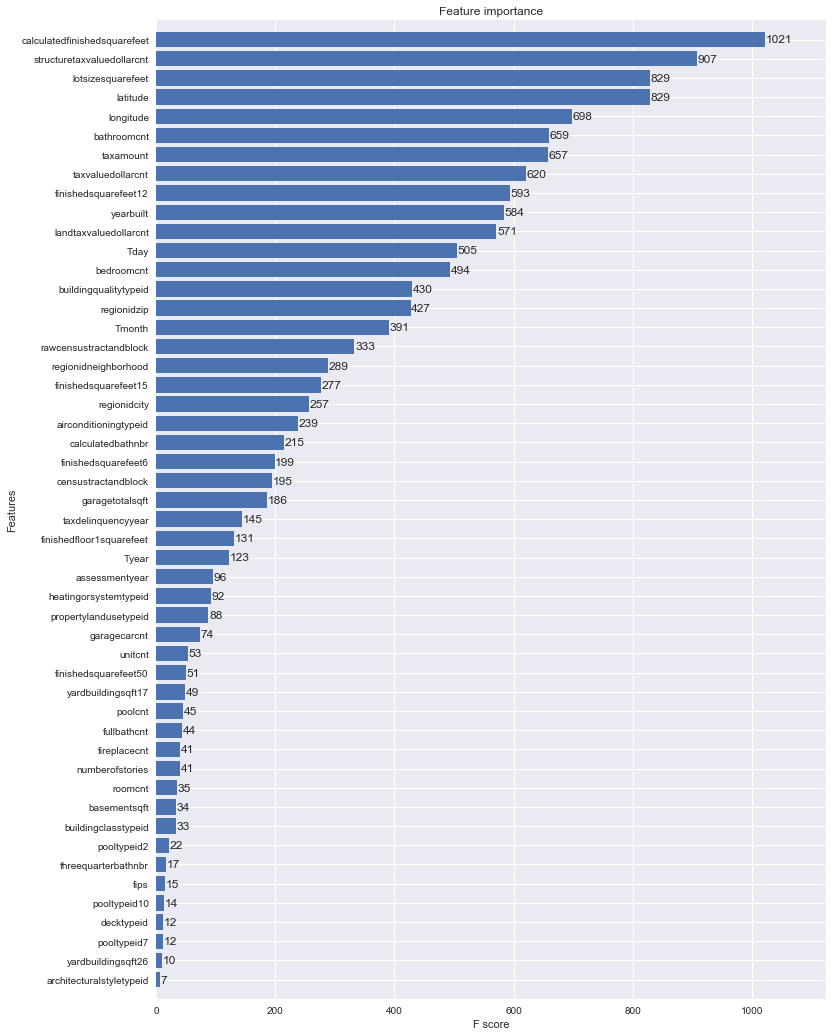

In [1040]:
#*** Feature importance evaluation ***#

train_y = data_trans_reduced_comb_f['logerror'].values
df_train = data_trans_reduced_comb_f.drop(['parcelid', 'logerror','abslogerror','taxdelinquencyflag','fireplaceflag','propertyzoningdesc','propertycountylandusecode','hashottuborspa'], axis=1)
feat_names = df_train.columns.values

for c in df_train.columns:
    if df_train[c].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(df_train[c].values))
        df_train[c] = lbl.transform(list(df_train[c].values))

#import xgboost as xgb
xgb_params = {
    'eta': 0.05,
    'max_depth': 8,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'silent': 1,
    'seed' : 0
}
dtrain = xgb.DMatrix(df_train, train_y, feature_names=df_train.columns.values)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=150)

# plot the important features #
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
plt.show()

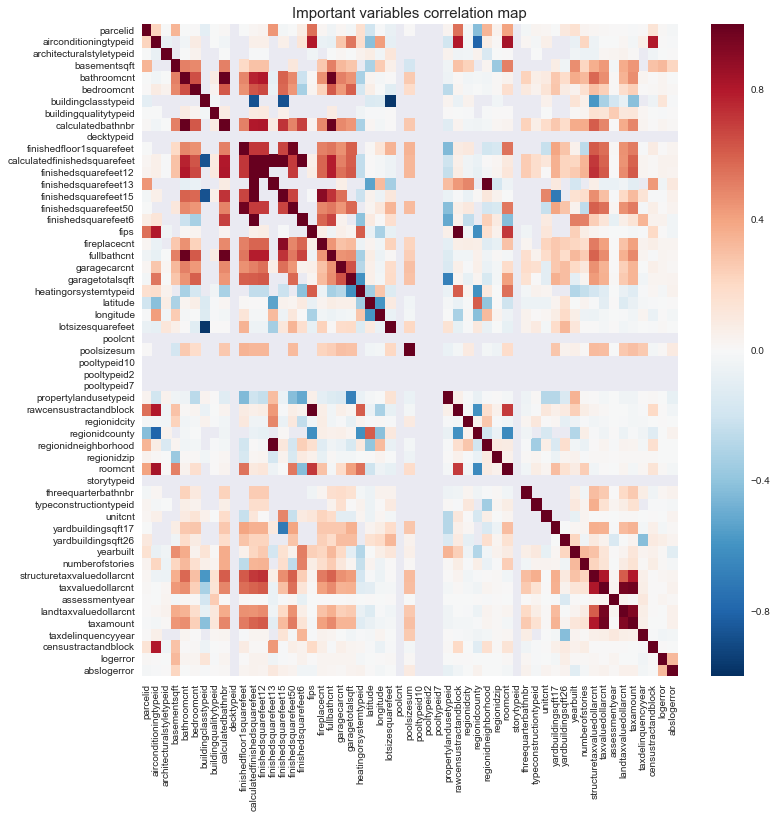

In [1041]:
plot_corr(data_trans_reduced_comb_f)

In [1087]:
dropcols = ['finishedsquarefeet12','finishedsquarefeet13', 'finishedsquarefeet15','finishedsquarefeet6']

#finishedsquarefeet50 and finishedfloor1squarefeet are the exactly the same information according to the dictionary descriptions, lets remove finishedsquarefeet50 as it has more missing values
#'bathroomcnt' and 'calculatedbathnbr' and 'fullbathcnt' seem to be the same information aswell according to the dictionary descriptions. Choose 'bathroomcnt' as has no missing values, so remove the other two
dropcols.append('finishedsquarefeet50')
dropcols.append('calculatedbathnbr')
dropcols.append('fullbathcnt')
dropcols.append('taxvaluedollarcnt')
dropcols.append('finishedfloor1squarefeet')
dropcols.append('calculatedbathnbr')
dropcols.append('fireplaceflag')
dropcols.append('garagecarcnt')
dropcols.append('pooltypeid7')
dropcols.append('regionidcounty')
dropcols.append('regionidcity')
dropcols.append('regionidzip')
dropcols.append('regionidneighborhood')
dropcols.append('assessmentyear')
dropcols.append('propertycountylandusecode')
dropcols.append('propertylandusetypeid')
dropcols.append('censustractandblock')
dropcols.append('threequarterbathnbr')
dropcols.append('roomcnt')
dropcols.append('fips')
dropcols.append('poolcnt')

In [1088]:
after_remov_similar_col_df = data_trans_reduced_comb_f.copy()

In [1089]:
ind1 = after_remov_similar_col_df['latitude'].isnull()
ind2 = after_remov_similar_col_df['longitude'].isnull()
after_remov_similar_col_df = after_remov_similar_col_df.loc[~ind1 & ~ind2, :]

In [1090]:
missingvalues_prop = (after_remov_similar_col_df.isnull().sum()/len(after_remov_similar_col_df)).reset_index()
missingvalues_prop.columns = ['fields','proportion']
missingvalues_prop = missingvalues_prop.sort_values(by = 'proportion', ascending = False)
print(missingvalues_prop)

                          fields  proportion
6            buildingclasstypeid    0.999809
13          finishedsquarefeet13    0.999554
41                   storytypeid    0.999449
3                   basementsqft    0.999449
46            yardbuildingsqft26    0.999009
49                 fireplaceflag    0.997636
2       architecturalstyletypeid    0.997207
43        typeconstructiontypeid    0.996882
16           finishedsquarefeet6    0.995196
9                     decktypeid    0.992513
29                  pooltypeid10    0.990456
28                   poolsizesum    0.989100
30                   pooltypeid2    0.986469
22                hashottuborspa    0.976925
56            taxdelinquencyyear    0.971333
55            taxdelinquencyflag    0.971333
45            yardbuildingsqft17    0.970197
14          finishedsquarefeet15    0.960560
10      finishedfloor1squarefeet    0.923653
15          finishedsquarefeet50    0.923653
18                  fireplacecnt    0.894012
42        

In [1091]:
after_remov_similar_col_df = after_remov_similar_col_df.drop(dropcols, axis=1)

In [1092]:
dropcols = missingvalues_prop.loc[(missingvalues_prop['proportion']>0.97),'fields']
dropcols = dropcols[(dropcols !='buildingclasstypeid') & (dropcols !='poolsizesum') &
                    (dropcols !='typeconstructiontypeid') & (dropcols !='architecturalstyletypeid') & 
                    (dropcols !='finishedsquarefeet13') & (dropcols !='fireplaceflag') & 
                    (dropcols !='finishedsquarefeet6')  & (dropcols !='yardbuildingsqft17')
                   ]

In [1093]:
after_remov_similar_col_df = after_remov_similar_col_df.drop(dropcols, axis=1)

In [774]:
def box_plot(df,label):
    x = df[label]
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True ,
                                        gridspec_kw={"height_ratios": (.15, .85)})
    me = np.mean(x)
    st = x.std(); 
    sns.boxplot(x, ax=ax_box)
    sns.distplot(x, ax=ax_hist, kde=False)
    ax_box.set(yticks=[])
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True)
    plt.xlim([me-2*st, me+2*st])
    plt.show()

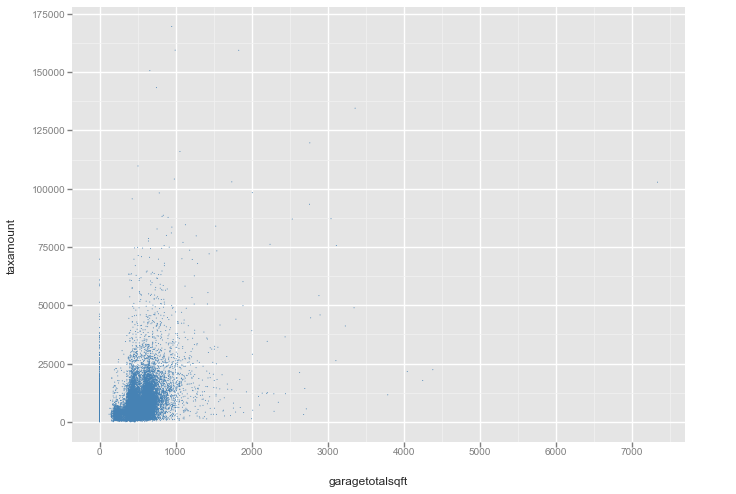

<ggplot: (685494909)>

In [712]:
from ggplot import *
#def plot_ggplot(df,xlabel,ylabel):
ggplot(aes(x='garagetotalsqft', y='taxamount'), data=after_remov_similar_col_df) + \
    geom_point(color='steelblue', size=1) + \
    stat_smooth()    

In [713]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
from sklearn.preprocessing import StandardScaler

In [797]:
def fillna_knn( df, base, target, fraction = 1, threshold = 10, n_neighbors = 5 ):
    assert isinstance( base , list ) or isinstance( base , np.ndarray ) and isinstance( target, str ) 
    whole = [ target ] + base
    
    miss = df[target].isnull()
    notmiss = ~miss 
    nummiss = miss.sum()
    
    X_target = df.loc[ notmiss, whole ].sample( frac = fraction )
    
    #enc = OneHotEncoder()    
    #enc.fit( X_target[ target ].unique().reshape( (-1,1) ) )
    #Y = enc.transform( X_target[ target ].values.reshape((-1,1)) ).toarray()
    
    Y = X_target[ target ].values.reshape((-1,1)) 
    X = X_target[ base  ]

    n_neighbors = n_neighbors
    clf = neighbors.KNeighborsClassifier( n_neighbors, weights = 'uniform' )
    clf.fit( X, Y )
    
    #print( 'the shape of active features: ' ,enc.active_features_.shape )
    
    Z = clf.predict(df.loc[miss, base])
    df.loc[ miss, target ]  = Z

In [823]:
def fillna_knn_reg( df, base, target, n_neighbors = 5 ):
    cols = base + [target]
    
    #X_train = df[cols]
    #X_ = df[cols]
    
    #scaler = StandardScaler(with_mean=True, with_std=True).fit(X_train[base].values.reshape(-1, 1))
    #rescaledX = scaler.transform(X_train[base].values.reshape(-1, 1))
    
    #X_train = X_train[base].values.reshape(-1, 1)
    X_ = df[base].values.reshape(-1, 1)
    
    #take those values from X_train[base] that correspond to non-null values of target, using latter's indices.
    #Both X_train and Y_train will have data corresponing to same indices
    
    #X_train = rescaledX[df[target].notnull()]
    X_train = X_[df[target].notnull()]
    Y_train = df.loc[df[target].notnull(),target].values.reshape(-1, 1)

    knn = KNeighborsRegressor(n_neighbors, n_jobs = -1)    
    # fitting the model
    knn.fit(X_train, Y_train)
    # predict the response
    X_test = X_[df[target].isnull()]
    pred = knn.predict(X_test)
    df.loc[df_train[target].isnull(),target] = pred
    return


In [835]:
import warnings
warnings.filterwarnings("ignore")

In [1094]:
cols_to_be_knn = ['yearbuilt','airconditioningtypeid','heatingorsystemtypeid','buildingclasstypeid',
                  'fireplacecnt','typeconstructiontypeid','architecturalstyletypeid','buildingqualitytypeid',
                  'numberofstories','unitcnt','propertyzoningdesc','poolsizesum']
for col in cols_to_be_knn:
    fillna_knn(after_remov_similar_col_df,['latitude','longitude'],col)

In [1095]:
cols_to_be_knn_reg = ['structuretaxvaluedollarcnt','landtaxvaluedollarcnt','taxamount',
                     'calculatedfinishedsquarefeet','garagetotalsqft','yardbuildingsqft17'
                     ,'lotsizesquarefeet']
for col in cols_to_be_knn_reg:
    fillna_knn_reg(after_remov_similar_col_df,['latitude','longitude'],col)

In [1096]:
after_enc_by_pop_df = after_remov_similar_col_df.copy()

In [1097]:
lbl = preprocessing.LabelEncoder()
lbl.fit(list(after_enc_by_pop_df['propertyzoningdesc'].values)) 
after_enc_by_pop_df['propertyzoningdesc'] = lbl.transform(list(after_enc_by_pop_df['propertyzoningdesc'].values))

In [1098]:
idx = []
for col in cols_to_be_knn:
    if col != 'yearbuilt':
        idx = after_enc_by_pop_df[col].value_counts().sort_values().index
        newval = after_enc_by_pop_df[col].max() + 1
        for i in range(len(idx)):
            after_enc_by_pop_df.loc[after_enc_by_pop_df[col]==idx[i],col] = newval
            newval += 1
    idx = []
    newval = 0
del idx, newval

In [1099]:
after_scaling_df = after_enc_by_pop_df.copy()

In [1100]:
after_scaling_df = after_scaling_df.drop(['parcelid','abslogerror'],axis=1)

In [1101]:
scaling_finished_df = after_scaling_df.copy()

In [661]:
from sklearn.preprocessing import RobustScaler

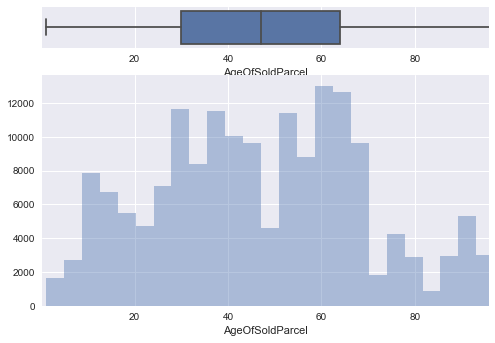

In [1102]:
scaling_finished_df['Tyear'] = scaling_finished_df['Tyear'].astype(float)
scaling_finished_df['AgeOfSoldParcel'] =  scaling_finished_df['Tyear'] - scaling_finished_df['yearbuilt']
scaling_finished_df['Tyear'] = scaling_finished_df['Tyear'] - scaling_finished_df['Tyear'].min()
scaling_finished_df = scaling_finished_df.drop(['Tyear','yearbuilt'],axis=1)
box_plot(scaling_finished_df,'AgeOfSoldParcel')

In [1103]:
for col in scaling_finished_df.columns.values:
    if col != 'logerror' :
        scaler = RobustScaler().fit(scaling_finished_df[col].values.reshape(-1, 1))
        scaling_finished_df[col] = scaler.transform(scaling_finished_df[col].values.reshape(-1, 1))

In [172]:
from sklearn.preprocessing import StandardScaler
from ggplot import ggplot, geom_line, aes
from ggplot import *
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [194]:
def plot_jointplot(df,feature1,feature2):
    color = sns.color_palette()
    plt.figure(figsize=(12,12))
    sns.jointplot(x=df[feature1].values, y=df[feature2].values, size=10, color=color[4])
    plt.ylabel(feature2, fontsize=12)
    plt.xlabel(feature1, fontsize=12)
    plt.title(feature1 + " Vs " + feature2, fontsize=15)
    plt.show()

In [64]:
def plot_countPlot(df,label):
    plt.figure(figsize=(12,8))
    sns.countplot(x=label, data=df)
    plt.ylabel('Count', fontsize=12)
    plt.xlabel(label, fontsize=12)
    plt.xticks(rotation='vertical')
    plt.title("Frequency of "+ label +" count", fontsize=15)
    plt.show()

In [ ]:
#import missingno as msno
#msno.heatmap(dataframe,figsize=(20,20))

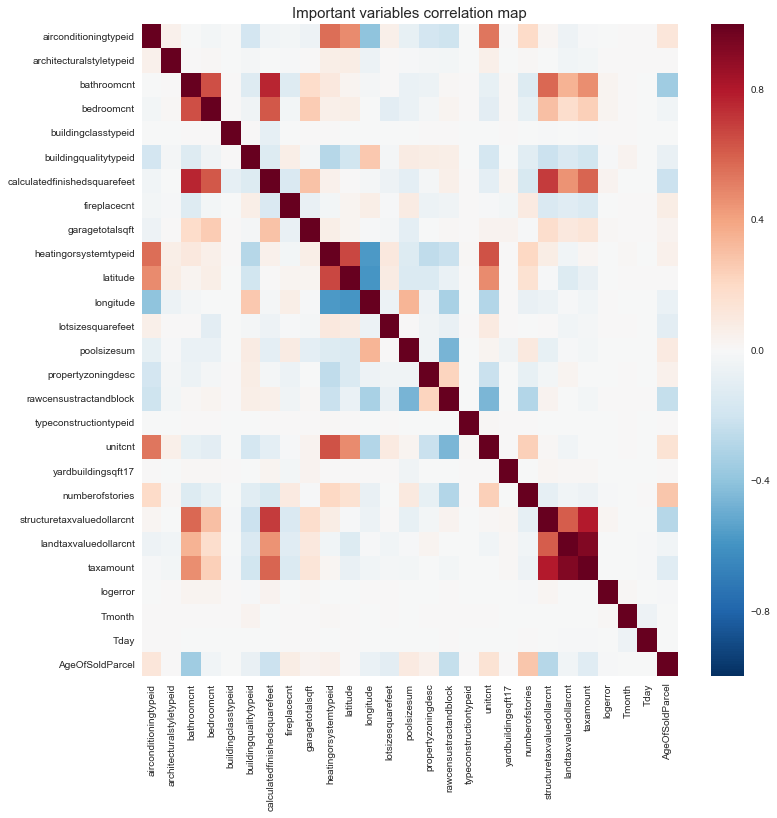

In [1104]:
plot_corr(scaling_finished_df)

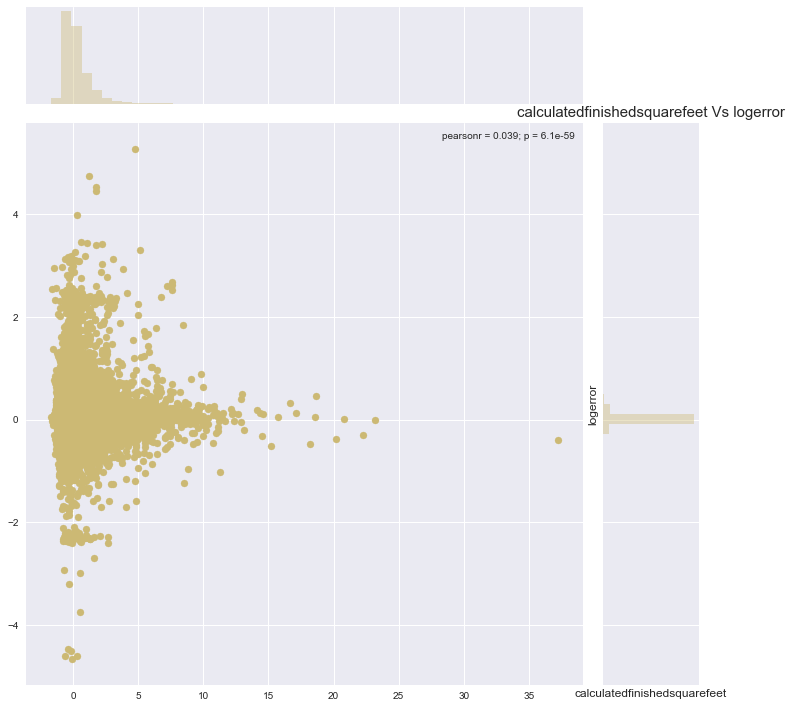

In [542]:
plot_jointplot(scaling_finished_df,'calculatedfinishedsquarefeet','logerror')

In [1105]:
x_cols = [col for col in scaling_finished_df.columns if col not in ['abslogerror','logerror'] if (scaling_finished_df[col].dtype=='float64' or scaling_finished_df[col].dtype=='int64')]
#x_cols = [col for col in after_imputing_df.columns if col not in ['abslogerror','logerror'] if (after_imputing_df[col].dtype=='float64' or after_imputing_df[col].dtype=='int64')]

In [1106]:
labels = []
values = []
for col in x_cols:
    labels.append(col)
    values.append(np.corrcoef(scaling_finished_df[col].values, scaling_finished_df.logerror.values)[0,1])
corr_df = pd.DataFrame({'col_labels':labels, 'corr_values':values})
corr_df = corr_df.sort_values(by='corr_values')
corr_df

col_labels  corr_values
19               numberofstories    -0.010959
25               AgeOfSoldParcel    -0.010249
5          buildingqualitytypeid    -0.009852
7                   fireplacecnt    -0.006071
24                          Tday    -0.004696
17                       unitcnt    -0.004421
14            propertyzoningdesc    -0.003873
10                      latitude    -0.002654
9          heatingorsystemtypeid    -0.002245
22                     taxamount    -0.001632
0          airconditioningtypeid    -0.001345
18            yardbuildingsqft17    -0.001322
13                   poolsizesum    -0.000934
21         landtaxvaluedollarcnt    -0.000321
16        typeconstructiontypeid    -0.000180
1       architecturalstyletypeid     0.002855
4            buildingclasstypeid     0.005917
11                     longitude     0.005988
15        rawcensustractandblock     0.006885
12             lotsizesquarefeet     0.007092
23                        Tmonth     0.009466
8                garagetotalsqft     0.011633
20    structuretaxvaluedollarcnt     0.016055
2                    bathroomcnt     0.026370
3                     bedroomcnt     0.027944
6   calculatedfinishedsquarefeet     0.038801

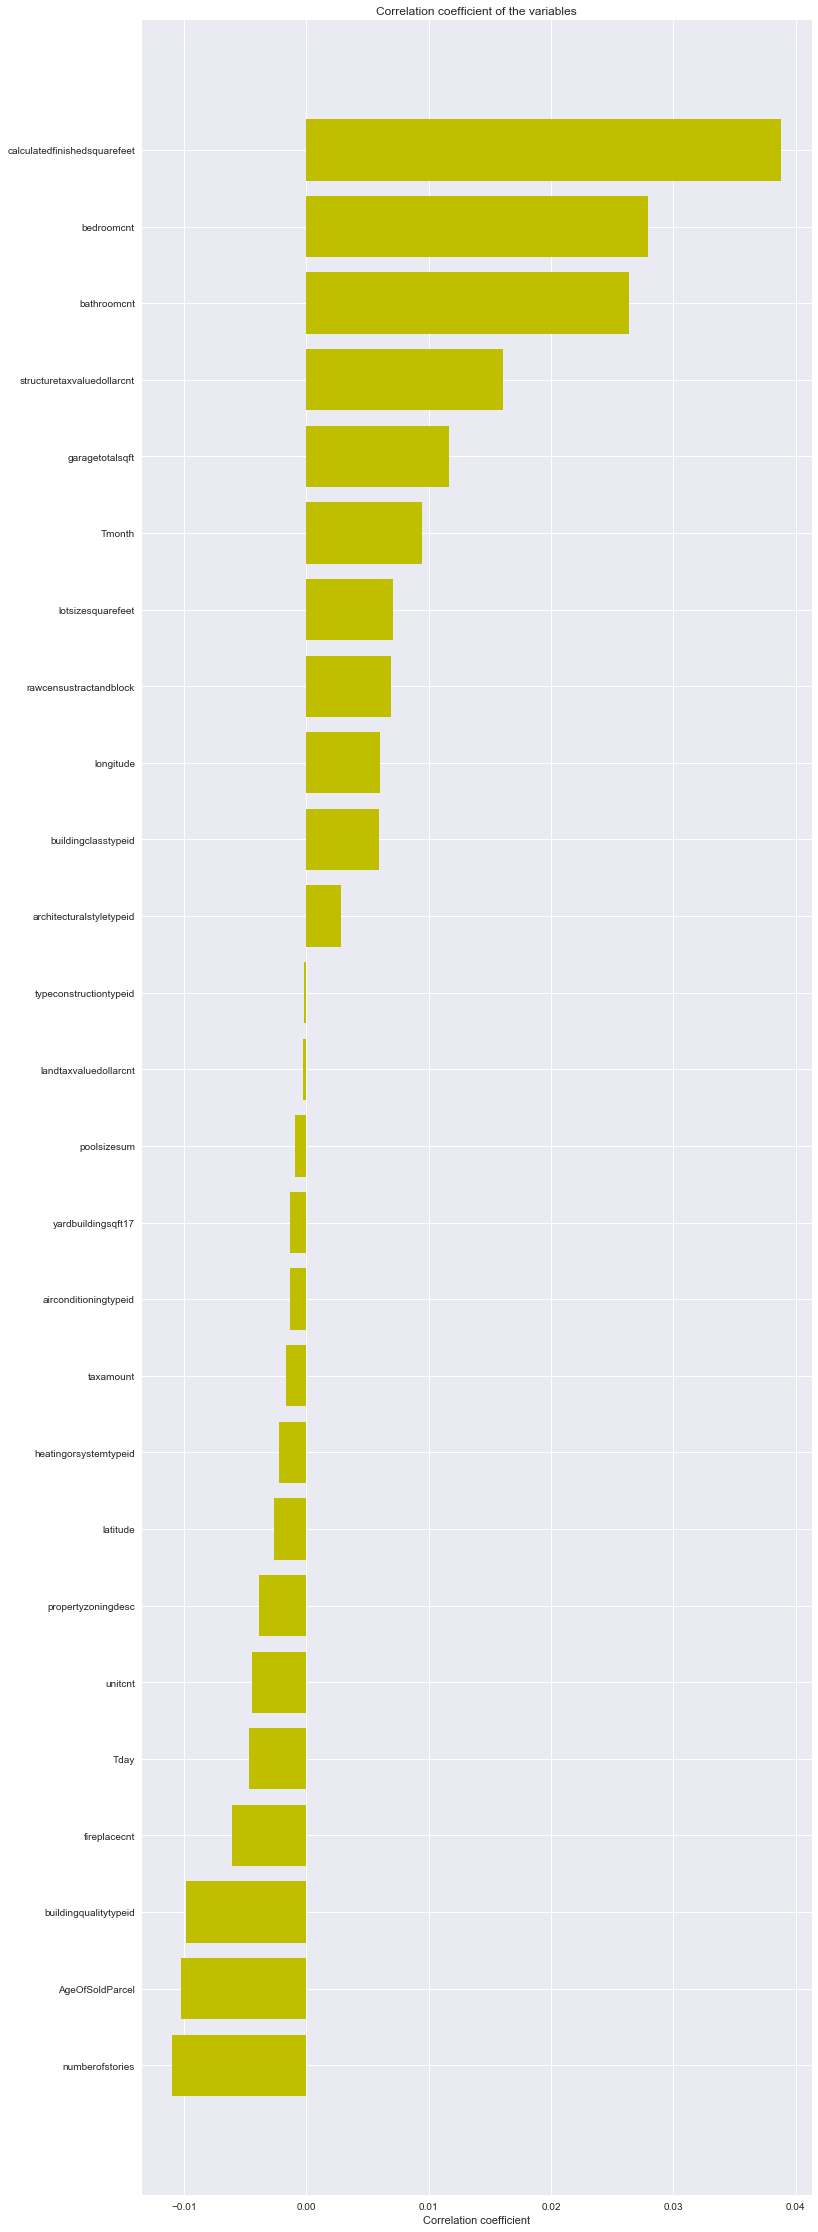

In [1107]:
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(12,40))
rects = ax.barh(ind, np.array(corr_df.corr_values.values), color='y')
ax.set_yticks(ind)
'''
fontdict = {'fontsize': 22,
 'fontweight': mlp.rcParams['axes.titleweight'],
 'verticalalignment': 'baseline'}
'''
ax.set_yticklabels(corr_df.col_labels.values,rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation coefficient of the variables")
#autolabel(rects)
plt.show()

In [894]:
#corr_df_sel = corr_df.ix[(corr_df['corr_values']>0.007) | (corr_df['corr_values'] < -0.002)]

In [1108]:
after_corr_df = scaling_finished_df.copy()

In [917]:
#l = corr_df_sel['col_labels'].values
#l = np.append(l,'logerror')
#cols_to_del = [col for col in after_corr_df.columns.values if col not in l] 
#after_corr_df = after_corr_df.drop(cols_to_del,axis=1)

In [1109]:
after_corr_feat_df = after_corr_df.drop('logerror',axis=1)

In [1110]:
from sklearn.cross_validation import train_test_split

In [1111]:
X_train_1st, X_test, y_train_1st, y_test = train_test_split(after_corr_feat_df,after_corr_df['logerror'],test_size=0.25, random_state=42)

# Success
print "Training and testing split was successful."
print X_train_1st.shape
print y_train_1st.shape
print X_test.shape
print y_test.shape

Training and testing split was successful.
(129425, 26)
(129425,)
(43142, 26)
(43142,)


In [1112]:
X_test_1, X_test_2, y_test_1,y_test_2 = train_test_split(X_test,y_test,test_size=0.5, random_state=28)

In [1114]:
split = 100000
X_train, y_train, X_valid, y_valid = X_train_1st[:split], y_train_1st[:split], X_train_1st[split:], y_train_1st[split:]

In [1006]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.cross_validation import cross_val_predict
from scipy import stats

In [1115]:
# *******Naive model : only predicts mean of train *********

y_pred = np.mean(y_train_1st)
y_naive1 = [y_pred for i in range(len(y_test_1))]
print('absolute test1 error ',mean_absolute_error(y_test_1,y_naive1))
y_naive2 = [y_pred for i in range(len(y_test_2))]
print('absolute test2 error ',mean_absolute_error(y_test_2,y_naive2))
y_naive = [y_pred for i in range(len(y_test))]
print('absolute whole test error ',mean_absolute_error(y_test,y_naive))
print('Variance or R^2 score for test',r2_score(y_test,y_naive))
print

('absolute test1 error ', 0.067809595225497482)
('absolute test2 error ', 0.069195377815702327)
('absolute whole test error ', 0.068502486520599912)
('Variance or R^2 score for test', -0.00010495835505408557)



In [1116]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lrpred = lr.predict(X_valid)
print('absolute val error', mean_absolute_error(y_valid,lrpred))
lrpredtest1 = lr.predict(X_test_1)
print('absolute test1 error', mean_absolute_error(y_test_1,lrpredtest1))
lrpredtest2 = lr.predict(X_test_2)
print('absolute test2 error', mean_absolute_error(y_test_2,lrpredtest2))
lrpredtest = lr.predict(X_test)
print('absolute total test error', mean_absolute_error(y_test,lrpredtest))
print('regr coeff for test1',lr.coef_)
print('Variance or R^2 score for test',r2_score(y_test,lrpredtest))

('absolute val error', 0.070912131304015705)
('absolute test1 error', 0.067970495932192843)
('absolute test2 error', 0.069173278337505417)
('absolute total test error', 0.06857188713484913)
('regr coeff for test1', array([  2.99097820e-03,   1.05923112e-02,  -3.19279588e-03,
         2.45538626e-03,   7.59592042e-16,  -2.57314848e-03,
         1.03853933e-02,  -2.93662926e-04,  -1.39672690e-05,
        -5.28435407e-04,   2.25155484e-04,   2.75589066e-03,
         1.34285688e-04,   6.07088054e-05,  -2.42872363e-04,
         1.92165899e-03,   2.92000179e-03,  -5.37339259e-07,
        -2.24464572e-04,   2.18990338e-04,   4.51200256e-03,
         8.81415849e-03,  -1.45084255e-02,   3.57343590e-03,
        -3.43522389e-04,  -1.38814596e-03]))
('Variance or R^2 score for test', 0.0024749829803575318)


In [1117]:
from sklearn.linear_model import Ridge
from sklearn import grid_search
from sklearn.cross_validation import ShuffleSplit

rr = Ridge(random_state=11) 
#rr.fit(X_train,y_train)

cv_sets = ShuffleSplit(X_train_1st.shape[0], n_iter = 10, test_size = 0.20, random_state = 11)
params = {'alpha':[0.1,0.5], 'max_iter':[1000],
         'solver':['auto','sag']}
scoring_fnc = 'mean_absolute_error'
grid = grid_search.GridSearchCV(rr, param_grid=params, scoring=scoring_fnc, cv=cv_sets)
grid_ob = grid.fit(X_train_1st,y_train_1st)
rr = grid_ob.best_estimator_

#For 16 features : for sag, alpha:0.5, max_iter:1000: total test error : 0.070464152

rrpred = rr.predict(X_valid)
print('absolute val error', mean_absolute_error(y_valid,rrpred))
rrpredtest1 = rr.predict(X_test_1)
print('absolute test1 error', mean_absolute_error(y_test_1,rrpredtest1))
rrpredtest2 = rr.predict(X_test_2)
print('absolute test2 error', mean_absolute_error(y_test_2,rrpredtest2))
rrpredtest = rr.predict(X_test)
print('absolute total test error', mean_absolute_error(y_test,rrpredtest))
print('Variance or R^2 score for test',r2_score(y_test,rrpredtest))
print('Best params chosen are ',grid_ob.best_params_)

('absolute val error', 0.070839098174015597)
('absolute test1 error', 0.067913552727935214)
('absolute test2 error', 0.069108577216427297)
('absolute total test error', 0.068511064972181249)
('Variance or R^2 score for test', 0.0026662556461687359)
('Best params chosen are ', {'alpha': 0.5, 'max_iter': 1000, 'solver': 'sag'})


In [1119]:
from sklearn.linear_model import Lasso

las = Lasso(random_state=11,fit_intercept=False) #0.070152241835015616 for GridCV, 0.070115121004358044
#las.fit(X_train,y_train)
cv_sets = ShuffleSplit(X_train_1st.shape[0], n_iter = 10, test_size = 0.20, random_state = 11)
params = {'alpha':[0.1,0.5], 'max_iter':[1000]}
scoring_fnc = 'mean_absolute_error'
grid = grid_search.GridSearchCV(las, param_grid=params, scoring=scoring_fnc, cv=cv_sets)
grid_ob = grid.fit(X_train_1st,y_train_1st)
las = grid_ob.best_estimator_
laspred = las.predict(X_valid)
print('absolute val error', mean_absolute_error(y_valid,laspred))
laspredtest1 = las.predict(X_test_1)
print('absolute total test1 error', mean_absolute_error(y_test_1,laspredtest1))
laspredtest2 = las.predict(X_test_2)
print('absolute total test2 error', mean_absolute_error(y_test_2,laspredtest2))
laspredtest = las.predict(X_test)
print('absolute total test error', mean_absolute_error(y_test,laspredtest))
print('Variance or R^2 score for test',r2_score(y_test,laspredtest))
print('Best params chosen are ',grid_ob.best_params_)

('absolute val error', 0.070665163525896704)
('absolute total test1 error', 0.06748571384853376)
('absolute total test2 error', 0.068785670831421203)
('absolute total test error', 0.068135692339977474)
('Variance or R^2 score for test', -0.0065689220473479359)
('Best params chosen are ', {'alpha': 0.1, 'max_iter': 1000})


In [1120]:
from sklearn.linear_model import BayesianRidge

#('absolute total test error', 0.070315913645267791)
#('Variance or R^2 score for test', 0.0025256875949750679)

br = BayesianRidge(n_iter=1000)
br.fit(X_train,y_train)
brpredval = br.predict(X_valid)
print('absolute total val error', mean_absolute_error(y_valid,brpredval))
brpredtest1 = br.predict(X_test_1)
print('absolute total test1 error', mean_absolute_error(y_test_1,brpredtest1))
brpredtest2 = br.predict(X_test_2)
print('absolute total test2 error', mean_absolute_error(y_test_2,brpredtest2))
brpredtest = br.predict(X_test)
print('absolute total test error', mean_absolute_error(y_test,brpredtest))
print('Variance or R^2 score for test',r2_score(y_test,brpredtest))

('absolute total val error', 0.070877522078706318)
('absolute total test1 error', 0.067917194051971649)
('absolute total test2 error', 0.069120067930041426)
('absolute total test error', 0.068518630991006552)
('Variance or R^2 score for test', 0.0026820579082644791)


In [1121]:
# stats for XGBoost regressor
#    'eta': 0.001,
#   'max_depth': 8,
#    'subsample': 0.6,
#    'colsample_bytree': 0.6,
#      num_boost_round : 8000

start = time()
d_train = xgb.DMatrix(X_train, y_train)
d_valid = xgb.DMatrix(X_valid)

xgb_params = {
    'eta': 0.02,
    'max_depth': 4,
    #'subsample': 0.6,
    #'colsample_bytree': 0.6,
    'objective': 'reg:linear',
    'eval_metric': 'mae',
    'silent': 1
}
xgbmodel = xgb.train(xgb_params,d_train,num_boost_round=10000)
print('xgbmodel :', xgbmodel)
pred = xgbmodel.predict(d_valid)
e = mean_absolute_error(y_valid,pred)
end = time()

print('time taken ', end-start)
print ('For validation absolute error', e)

# stats for XGBoost regressor for test_1 sample for config2
d_test = xgb.DMatrix(X_test)
predT =  xgbmodel.predict(d_test)
eT = mean_absolute_error(y_test,predT)
print ('For test1 absolute error', eT)

('xgbmodel :', <xgboost.core.Booster object at 0x1ac6989d0>)
('time taken ', 603.1364350318909)
('For validation absolute error', 0.07574744552108946)
('For test1 absolute error', 0.073513068223111974)


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from time import time

In [215]:
d_train = xgb.DMatrix(X_train, y_train)
d_valid = xgb.DMatrix(X_valid)
watchlist = [(d_train, 'train'), (d_valid, 'valid')]

#clf = xgb.train(xgb_params, d_train, 100, watchlist, verbose_eval=10) 

#same as clf results above
#model = xgb.train(xgb_params, d_train, 100)
start = time()
model = GradientBoostingRegressor(loss='ls', learning_rate=0.1, n_estimators=1000, subsample=0.8, 
                                  max_depth=6 )
model = model.fit(X_train, y_train)
#xgb_pred = model.predict(d_valid)
pred = model.predict(X_valid)
e = mean_absolute_error(y_valid,pred)
end = time()
pred = model.predict(X_test_1)
eT = mean_absolute_error(y_test_1,pred)

In [216]:
# stats for Gradient Boost regressor for test_1 sample (no training)
print('time taken ', end-start)
print ('absolute val error ', e)
print ('absolute test1 error ', eT)

('time taken ', 208.71707701683044)
('absolute val error ', 0.078719798242216976)
('absolute test1 error ', 0.078486862384852182)


In [127]:
# stats for XGBoost regressor for validation sample with training for config1
#    'eta': 0.001,
#   'max_depth': 7,
#    'subsample': 0.6,
#    'colsample_bytree': 0.6,
#      num_boost_round : 1000
#('time taken ', 33.103821992874146)
#('For validation absolute error', 0.20116051535827803)
#('For test1 absolute error', 0.20362736794131872)
#('For test2 absolute error', 0.20131972953020882)

#Same params as above except num of rounds changed to 4000
#('time taken ', 136.028058052063)
#('For validation absolute error', 0.071717596593644975)
#('For test1 absolute error', 0.072838143769358835)
#('For test2 absolute error', 0.071991483327164693)

#Same params as above except num of rounds changed to 7000
#('time taken ', 236.4542829990387)
#('For validation absolute error', 0.070213234593663229)
#('For test1 absolute error', 0.071112350982830058)
#('For test2 absolute error', 0.070433131174363728)
#('For entire test absolute error', 0.070772741078596865)

#For Same params as above except num of rounds changed to 8000, the test score worsened but better than when 
# eta changed to 0.002. Stats below are for when eta = 0.002
#('time taken ', 264.83625292778015)
#('For validation absolute error', 0.070984233595956667)
#('For test1 absolute error', 0.071817976989387897)
#('For test2 absolute error', 0.071198882471344593)
#('For entire test absolute error', 0.071508429730366238)
#For same boosting rounds and other params as above except eta = 0.0005:
#('time taken ', 259.9542860984802)
#('For validation absolute error', 0.071717449000867697)
#('For test1 absolute error', 0.072837269011416253)
#('For test2 absolute error', 0.071978137823392102)

#Same params as above except num of rounds changed to 10000. Eta = 0.001
#('time taken ', 333.6889901161194)
#('For validation absolute error', 0.070441836447831585)
#('For test1 absolute error', 0.071310751291463789)
#('For test2 absolute error', 0.070645614387189179)

# stats for XGBoost regressor for validation sample with training
#    'eta': 0.001,
#   'max_depth': 8,
#    'subsample': 0.6,
#    'colsample_bytree': 0.6,
#      num_boost_round : 8000
#('time taken ', 302.78505301475525)
#('For validation absolute error', 0.070455379028505238)
#('For test1 absolute error', 0.071333359708868713)
#('For test2 absolute error', 0.070661196423281086)

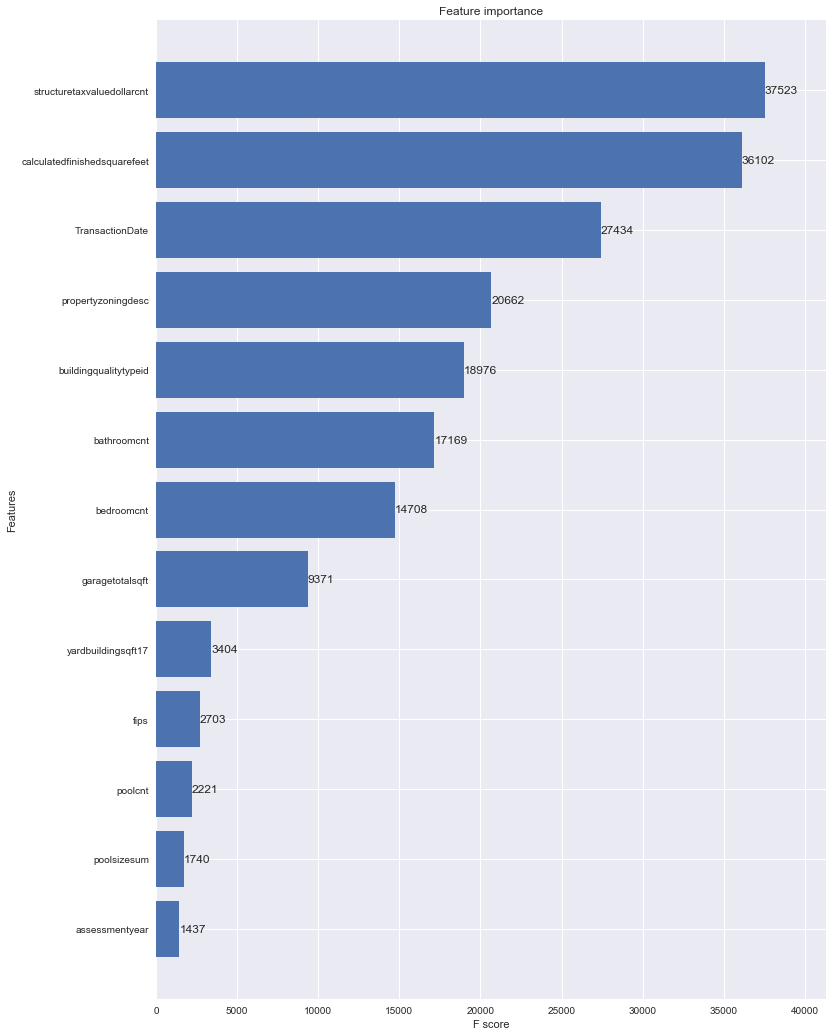

In [95]:
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(xgbmodel, max_num_features=50, height=0.8, ax=ax)
plt.show()

In [96]:
# stats for XGBoost regressor for validation sample with training (config1)
#    'eta': 0.005,
#   'max_depth': 8,
#    'subsample': 0.7,
#    'colsample_bytree': 0.7,
#      num_boost_round : 10000

print('time taken ', end-start)
print ('For validation absolute error', e)

d_test1 = xgb.DMatrix(X_test_1)
predT =  xgbmodel.predict(d_test1)
eT = mean_absolute_error(y_test_1,predT)
print ('For test1 absolute error', eT)
d_test2 = xgb.DMatrix(X_test_2)
predT2 =  xgbmodel.predict(d_test2)
eT2 = mean_absolute_error(y_test_2,predT2)
print ('For test2 absolute error', eT2)

('time taken ', 78.53736186027527)
('For validation absolute error', 0.070839447005555403)
('For test1 absolute error', 0.071634868867681806)
('For test2 absolute error', 0.071001790128656761)


In [97]:
# stats for XGBoost regressor for validation sample with training  (config2)
#    'eta': 0.001,
#   'max_depth': 8,
#    'subsample': 0.7,
#    'colsample_bytree': 0.7,
#      num_boost_round : 1000

print('time taken ', end-start)
print ('For validation absolute error', e)

# stats for XGBoost regressor for test_1 sample for config2
d_test1 = xgb.DMatrix(X_test_1)
predT =  xgbmodel.predict(d_test1)
eT = mean_absolute_error(y_test_1,predT)
print ('For test1 absolute error', eT)
d_test2 = xgb.DMatrix(X_test_2)
predT2 =  xgbmodel.predict(d_test2)
eT2 = mean_absolute_error(y_test_2,predT2)
print ('For test2 absolute error', eT2)

('time taken ', 78.53736186027527)
('For validation absolute error', 0.070839447005555403)
('For test1 absolute error', 0.071634868867681806)
('For test2 absolute error', 0.071001790128656761)


In [98]:
# stats for XGBoost regressor for validation sample with training
print('time taken ', end-start)
print ('absolute error', e) 

('time taken ', 78.53736186027527)
('absolute error', 0.070839447005555403)


In [ ]:
d_test1 = xgb.DMatrix(X_test_1) # 0.070964954936066027
xgb_pred = model.predict(d_test1)
mean_absolute_error(y_test_1,xgb_pred)

In [ ]:
d_test2 = xgb.DMatrix(X_test_2)  # 0.070355333169546716
xgb_pred = model.predict(d_test2)
mean_absolute_error(y_test_2,xgb_pred)

In [ ]:
mean_absolute_error(y_test_1,y_pred)

In [ ]:
r2_score(y_test_1,xgb_pred)

In [ ]:
d = {'eta':0.005,'max_depth':8,'subsample':0.7,'colsample_bytree':0.7 ,'num_boost_round':1000, 'valScore':0.070660886278811383, 
    'test1Score':0.071708082828990508, 'test2Score':0.070926445195721943}
finalRes = pd.DataFrame(data=d)

In [ ]:
#Notes

#df = data_trans_reduced_comb_f.melt('parcelid',var_name='Columns',  value_name='Values')

#g = sns.factorplot(x="parcelid", y="Values", hue='Columns', data=df)

#filter rows based on conditional check on column
#data_trans_reduced_comb_f_nn.loc[:,data_trans_reduced_comb_f_nn.isnull().sum() > 1].head()

#Merge other str columns into a column 
#scaling_finished_df['Tyear'] = (scaling_finished_df['Tyear'].map(str) + scaling_finished_df['Tmonth'] + scaling_finished_df['Tday']).astype(int)

#Rename columns
#scaling_finished_df.rename(columns = {'Tyear':'year','Tmonth':'month','Tday':'day'}, inplace = True)

#Convert a column to datetime
#scaling_finished_df['TransactionDate'] = pd.to_datetime(scaling_finished_df[['year','month','day']])

#print data_trans_reduced_comb_p[data_trans_reduced_comb_p['assessmentyear'] == (data_trans_reduced_comb_p['Tyear']).astype(int) - 1] #final

#result[~result['parcelid'].isin(data_trans_reduced_comb_f['parcelid'])]

#data_reduced_comb[~(data_reduced_comb['assessmentyear'].isnull()) & data_reduced_comb['assessmentyear'] != data_reduced_comb['']]
#data_reduced_comb_trans[data_reduced_comb_trans['assessmentyear'].isnull()].groupby('parcelid').size()

#sorted(result['Tyear'].unique())

#to find most frequent value
#after_remov_similar_col_df['unitcnt'].value_counts() 

#For all those rows where poolcnt is not null, what are the unique values of regionidcounty
#len(data_trans_reduced_comb_f.loc[data_trans_reduced_comb_f['poolcnt'].isnull()==False,'regionidcounty'].unique())

#after_remov_similar_col_df.loc[after_remov_similar_col_df['structuretaxvaluedollarcnt'].notnull() & after_remov_similar_col_df['landtaxvaluedollarcnt'].notnull() & after_remov_similar_col_df['taxvaluedollarcnt'].notnull(),:].head()

#index = after_remov_similar_col_df.poolcnt.isnull()
#after_remov_similar_col_df.loc[index,'poolcnt'] = 0

#np.where(data_reduced_comb_trans.groupby('parcelid').size() == 2)

#data[np.where(data.irow(0)[data.columns].notnull())[0]]
#middle_pred = data_trans_reduced_comb_f[~data_trans_reduced_comb_f['parcelid'].isin(top_10p_pred['parcelid']) & ~data_trans_reduced_comb_f['parcelid'].isin(worst_10p_pred['parcelid'])]